<a href="https://colab.research.google.com/github/lemon6243/Algorism/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train.shape

(891, 12)

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission.shape

(418, 2)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import missingno as msno 

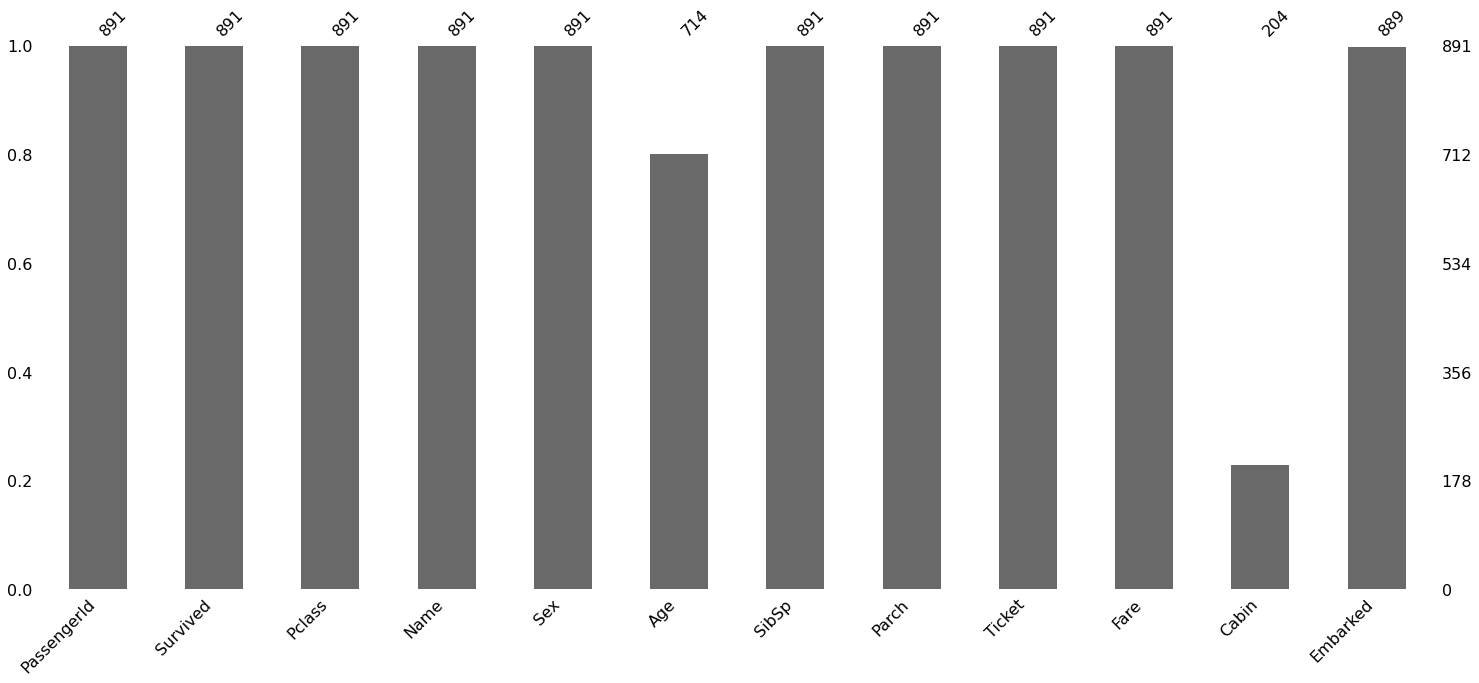

In [ ]:
msno.bar(train)

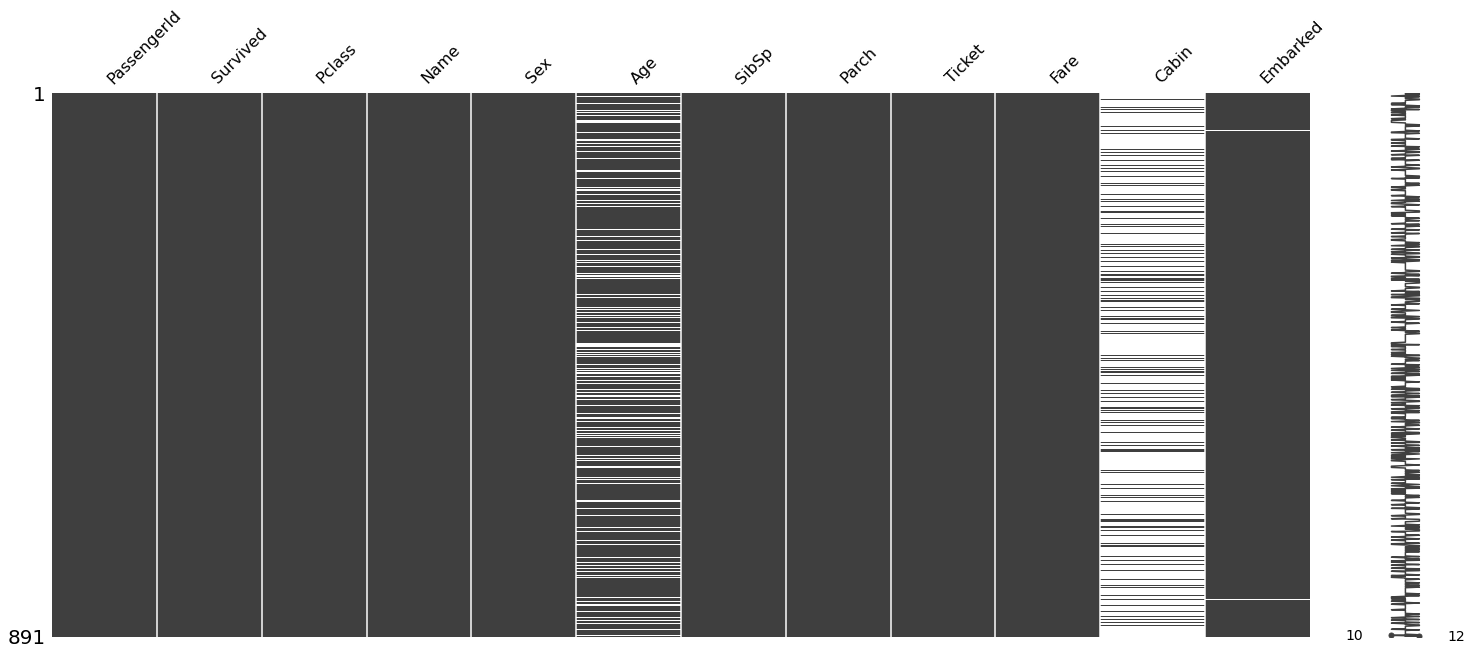

In [ ]:
msno.matrix(train)

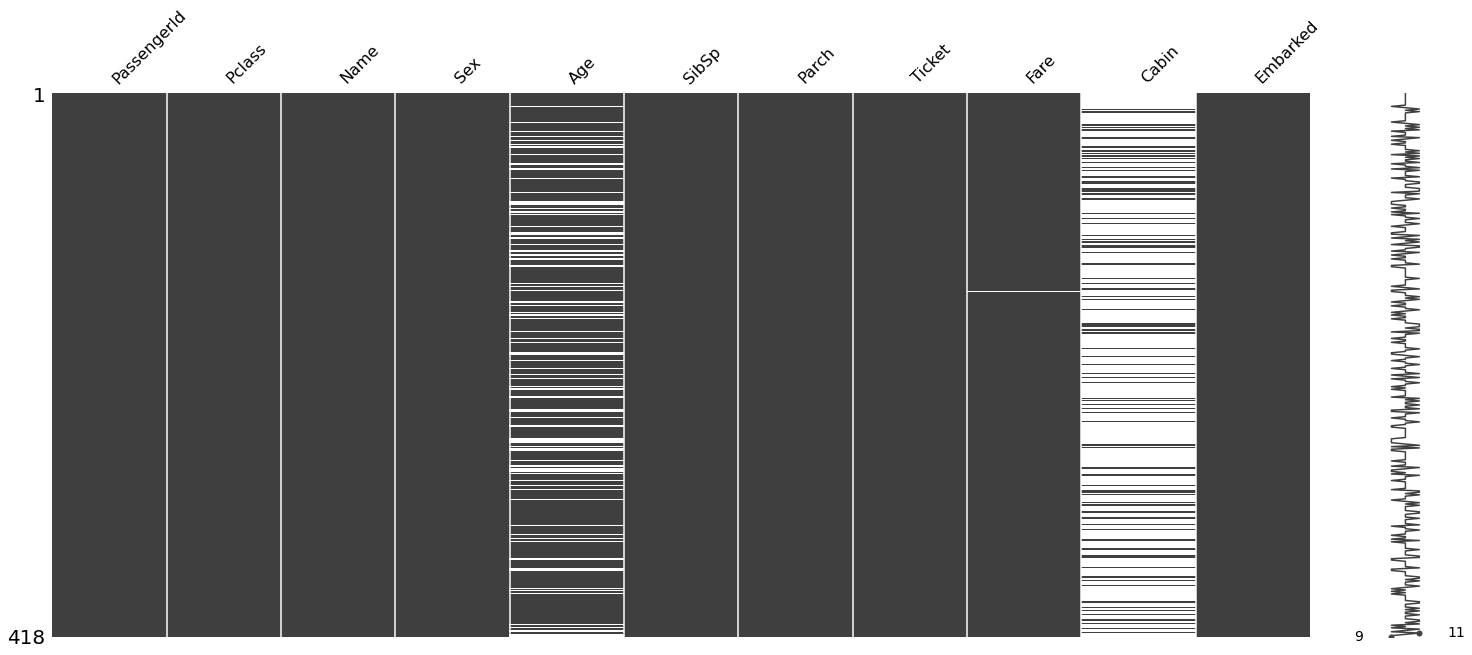

In [ ]:
msno.matrix(test)

In [ ]:
# 상관관계

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


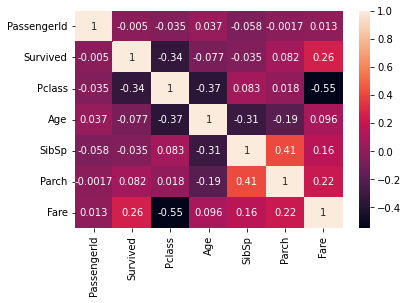

In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
train['Split']='Train'
test['Split']='Test'

In [ ]:
data = pd.concat([train, test], axis=0)
data.shape

(1309, 13)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [ ]:
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]

In [ ]:
data_num.shape

(1309, 6)

In [ ]:
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mean())

In [ ]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1309 non-null   float64
 2   SibSp     1309 non-null   int64  
 3   Parch     1309 non-null   int64  
 4   Fare      1309 non-null   float64
 5   Survived  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 71.6 KB


In [ ]:
selected_features = ['Pclass','Age','SibSp','Parch','Fare']

In [ ]:
X_train = data_num.loc[data['Split']=='Train',selected_features]
y_train = data_num.loc[data['Split']=='Train','Survived']

X_test = data_num.loc[data['Split']=='Test',selected_features]

In [ ]:
# 모델 학습 

# 학습 데이터 를 훈련데이터 80% 검증용 데이터 20% 분리한다. 

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size= 0.2,
                                            shuffle=True, random_state=20)

In [ ]:
# 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_tr, y_tr)

LogisticRegression()

In [ ]:
y_val_pred = lr_model.predict(X_val)

In [ ]:
y_val_pred

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_val

347    1.0
674    0.0
791    0.0
836    0.0
56     1.0
      ... 
694    0.0
428    0.0
431    1.0
563    0.0
484    1.0
Name: Survived, Length: 179, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy: %.4f"% accuracy_score(y_val, y_val_pred)) 
# 정확도
print("precision: %.4f"% precision_score(y_val, y_val_pred)) 
# 정밀도 True 예측했는데 True인 비율
print("recall: %.4f"% recall_score(y_val, y_val_pred)) 
# 재현률 실제  True 중에서  True로 예측하여 적중한 비율


Accuracy: 0.7207
precision: 0.6889
recall: 0.4627
